In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Complete-data.csv')

X = df.drop(columns=['Landslide'])
y = df['Landslide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(12, activation='linear', name='feature_layer'))
model.add(Dense(1, activation='sigmoid'))  # Not used for XGBoost but needed for training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
model.fit(X_train, y_train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50


4/4 [==============================] - 1s 4ms/step - loss: 1.7957 - accuracy: 0.4819
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8651 - accuracy: 0.4923
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0209 - accuracy: 0.5181
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8619 - accuracy: 0.5459
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.5449
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7338 - accuracy: 0.5397
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.5944
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.6852
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6718
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7214
Epoch 11/50
4/4 [====================

In [5]:
feature_model = Model(inputs=model.input, outputs=model.get_layer('feature_layer').output)

In [6]:
X_train_features = feature_model.predict(X_train)
X_test_features = feature_model.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [7]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 5, min_child_weight = 1, subsample = 0.9)
xgb.fit(X_train_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [8]:
y_pred = xgb.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.7613168724279835


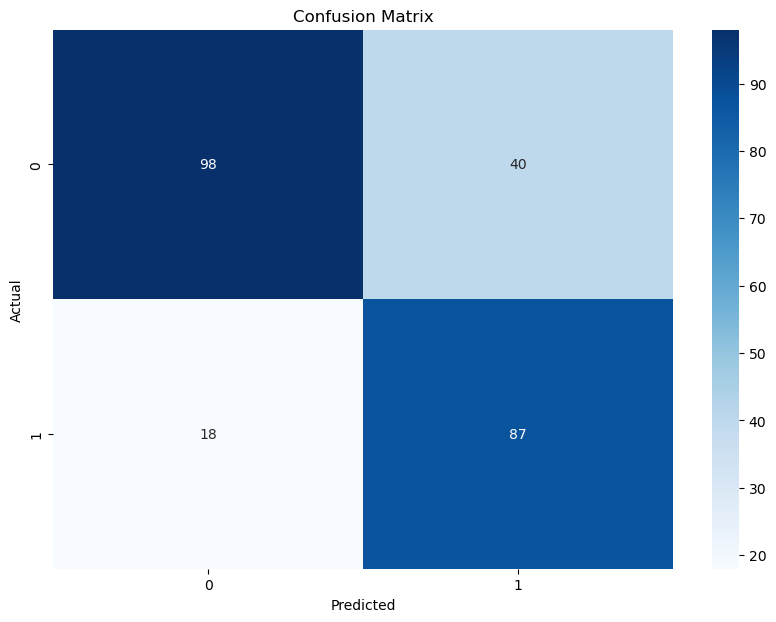

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [10]:
import pickle

with open('nn_xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)